In [ ]:
!pip install datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.6 MB/s eta 0:00:00


In [ ]:
import datasets

data = datasets.load_dataset('banking77') 

/root/.cache/huggingface/modules/datasets_modules/datasets/banking77/9898c11f6afa9521953d2ef205667b527bad14ef9cab445d470f16240c8c8ec4/banking77.py:59: FutureWarning: Dataset 'banking77' is deprecated and will be deleted. Use 'PolyAI/banking77' instead.
  warnings.warn(


Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

Dataset banking77 downloaded and prepared to /root/.cache/huggingface/datasets/banking77/default/1.1.0/9898c11f6afa9521953d2ef205667b527bad14ef9cab445d470f16240c8c8ec4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
t1=data['train']
t1.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['activate_my_card', 'age_limit', 'apple_pay_or_google_pay', 'atm_support', 'automatic_top_up', 'balance_not_updated_after_bank_transfer', 'balance_not_updated_after_cheque_or_cash_deposit', 'beneficiary_not_allowed', 'cancel_transfer', 'card_about_to_expire', 'card_acceptance', 'card_arrival', 'card_delivery_estimate', 'card_linking', 'card_not_working', 'card_payment_fee_charged', 'card_payment_not_recognised', 'card_payment_wrong_exchange_rate', 'card_swallowed', 'cash_withdrawal_charge', 'cash_withdrawal_not_recognised', 'change_pin', 'compromised_card', 'contactless_not_working', 'country_support', 'declined_card_payment', 'declined_cash_withdrawal', 'declined_transfer', 'direct_debit_payment_not_recognised', 'disposable_card_limits', 'edit_personal_details', 'exchange_charge', 'exchange_rate', 'exchange_via_app', 'extra_charge_on_statement', 'failed_transfer', 'fiat_currency_support', 'get_disposable_virtual_card

In [ ]:
import pandas as pd
data.set_format(type='pandas')
df=data['train'][:]

In [ ]:
df.nunique()

text     10003
label       77
dtype: int64

In [ ]:
df

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11
...,...,...
9998,You provide support in what countries?,24
9999,What countries are you supporting?,24
10000,What countries are getting support?,24
10001,Are cards available in the EU?,24


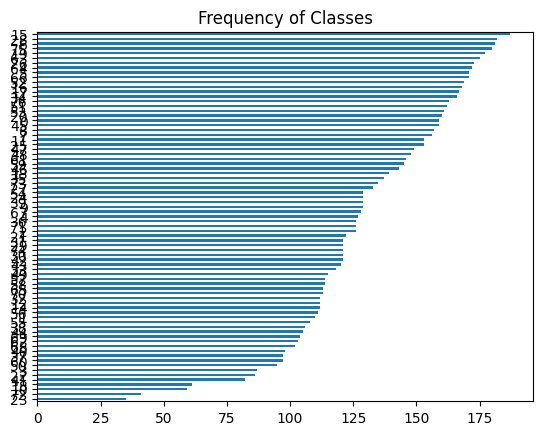

In [ ]:
import matplotlib.pyplot as plt
df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

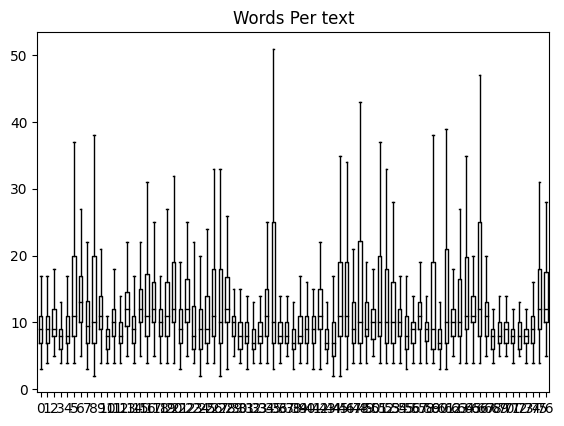

In [ ]:

df["Words Per text"] = df["text"].str.split().apply(len)
df.boxplot("Words Per text", by="label", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
df

,text,label,Words Per text
0,I am still waiting on my card?,11,7
1,What can I do if my card still hasn't arrived ...,11,13
2,I have been waiting over a week. Is the card s...,11,12
3,Can I track my card while it is in the process...,11,13
4,"How do I know if I will get my card, or if it ...",11,15
...,...,...,...
9998,You provide support in what countries?,24,6
9999,What countries are you supporting?,24,5
10000,What countries are getting support?,24,5
10001,Are cards available in the EU?,24,6


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2)
print(len(train_data))
print(len(test_data))

8002
2001


In [ ]:
#Dataset Creation for similar sentences
import random
import pandas as pd

def generate_sentence_pairs(data):
    sentence_pairs = []
    label_counts = {}

    # Count the occurrences of each label
    labels = data['label'].unique()
    for label in labels:
        label_data = data[data['label'] == label]
        count = len(label_data)
        label_counts[label] = count

    # Generate sentence pairs with the same label
    for label in label_counts:
        count = label_counts[label]
        label_data = data[data['label'] == label]

        for i in range(count):
            row1 = random.choice(label_data.index)
            row2 = random.choice(label_data.index)
            sentence1 = label_data.loc[row1, 'text']
            sentence2 = label_data.loc[row2, 'text']
            sentence_pairs.append((sentence1, sentence2, label))

    pairs_df = pd.DataFrame(sentence_pairs, columns=['sentence1', 'sentence2', 'label'])
    return pairs_df

# Example usage


pairs_df_samelabel = generate_sentence_pairs(test_data)
pairs_df_samelabel



,sentence1,sentence2,label
0,There is a payment on my card that I do not re...,There is a record of payment I never submitted...,16
1,There are a couple payments with my card shown...,I did not charge my account for that transacti...,16
2,I don't think I made this payment that is show...,Is it possible someone has access to my card? ...,16
3,There is a record of payment I never submitted...,I'm not recognizing the card payment.,16
4,Is it possible someone has access to my card? ...,There's a card payment with a name I don't rec...,16
...,...,...,...
1996,Any charges applicable for new card?,Any charges applicable for new card?,23
1997,"I am having issues using contactless payments,...",I need help fixing my contactless. It's not wo...,23
1998,"I am having issues using contactless payments,...",Should i uninstall the app before i try it again?,23
1999,Any charges applicable for new card?,I need help fixing my contactless. It's not wo...,23


In [ ]:
pairs_df_samelabel['train_label'] = 1
pairs_df_samelabel

,sentence1,sentence2,label,train_label
0,There is a payment on my card that I do not re...,There is a record of payment I never submitted...,16,1
1,There are a couple payments with my card shown...,I did not charge my account for that transacti...,16,1
2,I don't think I made this payment that is show...,Is it possible someone has access to my card? ...,16,1
3,There is a record of payment I never submitted...,I'm not recognizing the card payment.,16,1
4,Is it possible someone has access to my card? ...,There's a card payment with a name I don't rec...,16,1
...,...,...,...,...
1996,Any charges applicable for new card?,Any charges applicable for new card?,23,1
1997,"I am having issues using contactless payments,...",I need help fixing my contactless. It's not wo...,23,1
1998,"I am having issues using contactless payments,...",Should i uninstall the app before i try it again?,23,1
1999,Any charges applicable for new card?,I need help fixing my contactless. It's not wo...,23,1


In [ ]:
pairs_df_samelabel=pairs_df_samelabel.drop_duplicates()

In [ ]:
pairs_df_samelabel.drop('label', inplace=True, axis=1)
pairs_df_samelabel

<ipython-input-14-619e11736077>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairs_df_samelabel.drop('label', inplace=True, axis=1)


,sentence1,sentence2,train_label
0,There is a payment on my card that I do not re...,There is a record of payment I never submitted...,1
1,There are a couple payments with my card shown...,I did not charge my account for that transacti...,1
2,I don't think I made this payment that is show...,Is it possible someone has access to my card? ...,1
3,There is a record of payment I never submitted...,I'm not recognizing the card payment.,1
4,Is it possible someone has access to my card? ...,There's a card payment with a name I don't rec...,1
...,...,...,...
1996,Any charges applicable for new card?,Any charges applicable for new card?,1
1997,"I am having issues using contactless payments,...",I need help fixing my contactless. It's not wo...,1
1998,"I am having issues using contactless payments,...",Should i uninstall the app before i try it again?,1
1999,Any charges applicable for new card?,I need help fixing my contactless. It's not wo...,1


In [ ]:
#Data set creation for different pair of sentences
import random
import pandas as pd

def generate_sentence_pairs(data, num_pairs):
    unique_labels = data['label'].unique()

    pairs = []
    for _ in range(num_pairs):
        label1, label2 = random.sample(list(unique_labels), 2)
        sentences1 = data[data['label'] == label1]['text'].tolist()
        sentences2 = data[data['label'] == label2]['text'].tolist()
        sentence1 = random.choice(sentences1)
        sentence2 = random.choice(sentences2)
        pairs.append((sentence1, sentence2, label1, label2))

    pairs_df = pd.DataFrame(pairs, columns=['sentence1', 'sentence2', 'label1', 'label2'])
    return pairs_df

# Example usage


num_pairs = 2001
pairs_df_different = generate_sentence_pairs(test_data, num_pairs)
pairs_df_different


,sentence1,sentence2,label1,label2
0,Why isn't a refund showing on my statement?,I keep getting an error message when I'm tryin...,51,7
1,Let me know when you charge extra for payments...,I tried the wrong PIN too many times.,15,49
2,Are there any ATM's near me that accept this c...,Do you have to be 18 to make an account?,3,1
3,Where are the cards transported to?,Is there a top up fee?,43,56
4,How can I top up using google pay?,Why isn't my deposit showing up?,2,6
...,...,...,...,...
1996,How can I exchange USD and GBP in the app?,Please help me get a Visa card.,33,73
1997,Explain to me why a transfer would be declined.,I have a card payment that has been pending fo...,27,45
1998,If I want to add funds to the account using Am...,Can I have it by a certain date?,54,12
1999,How long does a check take to show up in the a...,I received a fee I should not have.,6,15


In [ ]:
pairs_df_different=pairs_df_different.drop_duplicates()
pairs_df_different['train_label'] = 0
pairs_df_different.drop('label1', inplace=True, axis=1)
pairs_df_different.drop('label2', inplace=True, axis=1)
pairs_df_different



<ipython-input-16-8482ef2f03ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairs_df_different['train_label'] = 0
<ipython-input-16-8482ef2f03ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairs_df_different.drop('label1', inplace=True, axis=1)
<ipython-input-16-8482ef2f03ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairs_df_different.drop('label2', inplace=Tru

,sentence1,sentence2,train_label
0,Why isn't a refund showing on my statement?,I keep getting an error message when I'm tryin...,0
1,Let me know when you charge extra for payments...,I tried the wrong PIN too many times.,0
2,Are there any ATM's near me that accept this c...,Do you have to be 18 to make an account?,0
3,Where are the cards transported to?,Is there a top up fee?,0
4,How can I top up using google pay?,Why isn't my deposit showing up?,0
...,...,...,...
1996,How can I exchange USD and GBP in the app?,Please help me get a Visa card.,0
1997,Explain to me why a transfer would be declined.,I have a card payment that has been pending fo...,0
1998,If I want to add funds to the account using Am...,Can I have it by a certain date?,0
1999,How long does a check take to show up in the a...,I received a fee I should not have.,0


In [ ]:
frames = [pairs_df_different, pairs_df_samelabel]
result = pd.concat(frames)


In [ ]:
result

,sentence1,sentence2,train_label
0,Why isn't a refund showing on my statement?,I keep getting an error message when I'm tryin...,0
1,Let me know when you charge extra for payments...,I tried the wrong PIN too many times.,0
2,Are there any ATM's near me that accept this c...,Do you have to be 18 to make an account?,0
3,Where are the cards transported to?,Is there a top up fee?,0
4,How can I top up using google pay?,Why isn't my deposit showing up?,0
...,...,...,...
1996,Any charges applicable for new card?,Any charges applicable for new card?,1
1997,"I am having issues using contactless payments,...",I need help fixing my contactless. It's not wo...,1
1998,"I am having issues using contactless payments,...",Should i uninstall the app before i try it again?,1
1999,Any charges applicable for new card?,I need help fixing my contactless. It's not wo...,1


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=3465a73715851c147b9f085505c28d39b786854f4c87ecaef47a9cf4c2bd472b
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
#Let's Test on Pretrained sbert model.
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score

# Load pre-trained SBERT model
model_name = 'all-mpnet-base-v2'
model = SentenceTransformer(model_name)


In [ ]:
grouped_df_0 = result.groupby('train_label')
test_df_lab0 = grouped_df_0.get_group(0)
grouped_df_1 = result.groupby('train_label')
test_df_lab1 = grouped_df_1.get_group(1)
frames = [test_df_lab0, test_df_lab1]
final_test_data = pd.concat(frames)
final_test_data

,sentence1,sentence2,train_label
0,Why isn't a refund showing on my statement?,I keep getting an error message when I'm tryin...,0
1,Let me know when you charge extra for payments...,I tried the wrong PIN too many times.,0
2,Are there any ATM's near me that accept this c...,Do you have to be 18 to make an account?,0
3,Where are the cards transported to?,Is there a top up fee?,0
4,How can I top up using google pay?,Why isn't my deposit showing up?,0
...,...,...,...
1996,Any charges applicable for new card?,Any charges applicable for new card?,1
1997,"I am having issues using contactless payments,...",I need help fixing my contactless. It's not wo...,1
1998,"I am having issues using contactless payments,...",Should i uninstall the app before i try it again?,1
1999,Any charges applicable for new card?,I need help fixing my contactless. It's not wo...,1


In [ ]:
len(final_test_data)

3951

In [ ]:
from sklearn.metrics.pairwise import paired_cosine_distances, paired_euclidean_distances, paired_manhattan_distances
embeddings1 = model.encode(final_test_data['sentence1'].tolist(),
                           batch_size=8, show_progress_bar=True, convert_to_numpy=True)

embeddings2 = model.encode(final_test_data['sentence2'].tolist(),
                           batch_size=8, show_progress_bar=True, convert_to_numpy=True)

labels = final_test_data['train_label'].tolist()

cosine_scores = 1 - (paired_cosine_distances(embeddings1, embeddings2))

print(cosine_scores[:int(len(test_df_lab0))].mean()) # dissimilar pairs
print(cosine_scores[int(len(test_df_lab1)):].mean()) # similar pairs

Batches:   0%|          | 0/494 [00:00<?, ?it/s]

Batches:   0%|          | 0/494 [00:00<?, ?it/s]

0.2103577
0.5882472


<ipython-input-25-08a3fbce7202>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cosine_scores[:int(len(test_df_lab0))], label = "0")
<ipython-input-25-08a3fbce7202>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cosine_scores[int(len(test_df_lab1)):], label = "1")


<Axes: ylabel='Density'>

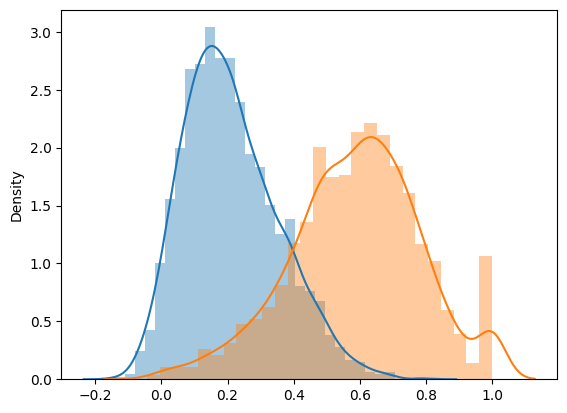

In [ ]:
import seaborn as sns
sns.distplot(cosine_scores[:int(len(test_df_lab0))], label = "0")
sns.distplot(cosine_scores[int(len(test_df_lab1)):], label = "1")

!!!!!!!! Lets train the MpNet on our data model !!!!!!!!

*Create Training Data*

In [ ]:
#Dataset Creation for similar sentences
import random
import pandas as pd

def generate_sentence_pairs(data):
    sentence_pairs = []
    label_counts = {}

    # Count the occurrences of each label
    labels = data['label'].unique()
    for label in labels:
        label_data = data[data['label'] == label]
        count = len(label_data)
        label_counts[label] = count

    # Generate sentence pairs with the same label
    for label in label_counts:
        count = label_counts[label]
        label_data = data[data['label'] == label]

        for i in range(count):
            row1 = random.choice(label_data.index)
            row2 = random.choice(label_data.index)
            sentence1 = label_data.loc[row1, 'text']
            sentence2 = label_data.loc[row2, 'text']
            sentence_pairs.append((sentence1, sentence2, label))

    pairs_df = pd.DataFrame(sentence_pairs, columns=['sentence1', 'sentence2', 'label'])
    return pairs_df

# Example usage


pairs_df_samelabel_train = generate_sentence_pairs(train_data)
pairs_df_samelabel_train

,sentence1,sentence2,label
0,Can I wait for you to send me a new card when ...,Tell me what I should do after my card expires.,9
1,My card expires next week. How do I get a new ...,I'm in China and really need a new card.,9
2,"My card is about to expire, what do I do?","If I order a new card, how much will it be and...",9
3,Do I need to order a new card if mine is expir...,My card is almost expired. How fast will I ge...,9
4,Where can I order a card when I am in China?,How do I go about ordering a new bank card?,9
...,...,...,...
7997,Are there virtual cards,How do I get my virtual card?,40
7998,Where do I get a virtual card?,What is the virtual card and how can i get one?,40
7999,Is it possible to order a virtual card?,Where can I order my virtual card?,40
8000,Is there an alternative to a physical card?,"I did not get my virtual card yet, Why?",40


In [ ]:
pairs_df_samelabel_train['train_label'] = 1
pairs_df_samelabel_train

,sentence1,sentence2,label,train_label
0,Can I wait for you to send me a new card when ...,Tell me what I should do after my card expires.,9,1
1,My card expires next week. How do I get a new ...,I'm in China and really need a new card.,9,1
2,"My card is about to expire, what do I do?","If I order a new card, how much will it be and...",9,1
3,Do I need to order a new card if mine is expir...,My card is almost expired. How fast will I ge...,9,1
4,Where can I order a card when I am in China?,How do I go about ordering a new bank card?,9,1
...,...,...,...,...
7997,Are there virtual cards,How do I get my virtual card?,40,1
7998,Where do I get a virtual card?,What is the virtual card and how can i get one?,40,1
7999,Is it possible to order a virtual card?,Where can I order my virtual card?,40,1
8000,Is there an alternative to a physical card?,"I did not get my virtual card yet, Why?",40,1


In [ ]:
#Data set creation for different pair of sentences
import random
import pandas as pd

def generate_sentence_pairs(data, num_pairs):
    unique_labels = data['label'].unique()

    pairs = []
    for _ in range(num_pairs):
        label1, label2 = random.sample(list(unique_labels), 2)
        sentences1 = data[data['label'] == label1]['text'].tolist()
        sentences2 = data[data['label'] == label2]['text'].tolist()
        sentence1 = random.choice(sentences1)
        sentence2 = random.choice(sentences2)
        pairs.append((sentence1, sentence2, label1, label2))

    pairs_df = pd.DataFrame(pairs, columns=['sentence1', 'sentence2', 'label1', 'label2'])
    return pairs_df

# Example usage


num_pairs = 8002
pairs_df_different_train = generate_sentence_pairs(train_data, num_pairs)
pairs_df_different_train


,sentence1,sentence2,label1,label2
0,How do I replace my card?,I tried activating my card and it doesn't work...,9,0
1,I just deposited cash to my account and can't ...,do I need to verify my identity before I can u...,6,74
2,I don't think I was supposed to be charged so ...,When will my account receive the money?,64,67
3,How can disposable cards be used?,I thought transfers were free. Why was I charg...,37,64
4,Hi need your help for getting the refund or ca...,why hasnt my card come in yet?,52,11
...,...,...,...,...
7997,What is the verification process for my card?,What steps do I need to take for the identity ...,71,69
7998,Is exchanging currencies a feature of the app?,Why was my cash withdrawal given the wrong exc...,33,76
7999,There was a purchase on my card recently to a ...,"I received a ""declined"" message when doing a t...",16,27
8000,Why is my top-up pending?,My bag got stolen with all my cards. Can you p...,47,41


In [ ]:
pairs_df_different_train['train_label'] = 0
pairs_df_different_train

,sentence1,sentence2,label1,label2,train_label
0,How do I replace my card?,I tried activating my card and it doesn't work...,9,0,0
1,I just deposited cash to my account and can't ...,do I need to verify my identity before I can u...,6,74,0
2,I don't think I was supposed to be charged so ...,When will my account receive the money?,64,67,0
3,How can disposable cards be used?,I thought transfers were free. Why was I charg...,37,64,0
4,Hi need your help for getting the refund or ca...,why hasnt my card come in yet?,52,11,0
...,...,...,...,...,...
7997,What is the verification process for my card?,What steps do I need to take for the identity ...,71,69,0
7998,Is exchanging currencies a feature of the app?,Why was my cash withdrawal given the wrong exc...,33,76,0
7999,There was a purchase on my card recently to a ...,"I received a ""declined"" message when doing a t...",16,27,0
8000,Why is my top-up pending?,My bag got stolen with all my cards. Can you p...,47,41,0


In [ ]:
pairs_df_different_train

,sentence1,sentence2,label1,label2,train_label
0,How do I replace my card?,I tried activating my card and it doesn't work...,9,0,0
1,I just deposited cash to my account and can't ...,do I need to verify my identity before I can u...,6,74,0
2,I don't think I was supposed to be charged so ...,When will my account receive the money?,64,67,0
3,How can disposable cards be used?,I thought transfers were free. Why was I charg...,37,64,0
4,Hi need your help for getting the refund or ca...,why hasnt my card come in yet?,52,11,0
...,...,...,...,...,...
7997,What is the verification process for my card?,What steps do I need to take for the identity ...,71,69,0
7998,Is exchanging currencies a feature of the app?,Why was my cash withdrawal given the wrong exc...,33,76,0
7999,There was a purchase on my card recently to a ...,"I received a ""declined"" message when doing a t...",16,27,0
8000,Why is my top-up pending?,My bag got stolen with all my cards. Can you p...,47,41,0


In [ ]:
pairs_df_samelabel_train.drop('label', inplace=True, axis=1)
pairs_df_different_train.drop('label1', inplace=True, axis=1)
pairs_df_different_train.drop('label2', inplace=True, axis=1)
pairs_df_samelabel_train=pairs_df_samelabel_train.drop_duplicates()
pairs_df_different_train=pairs_df_different_train.drop_duplicates()

frames = [pairs_df_different_train, pairs_df_samelabel_train]
result_train = pd.concat(frames)

In [ ]:
result_train['train_label'] = result_train['train_label'].astype(float)
result_train

,sentence1,sentence2,train_label
0,How do I replace my card?,I tried activating my card and it doesn't work...,0.0
1,I just deposited cash to my account and can't ...,do I need to verify my identity before I can u...,0.0
2,I don't think I was supposed to be charged so ...,When will my account receive the money?,0.0
3,How can disposable cards be used?,I thought transfers were free. Why was I charg...,0.0
4,Hi need your help for getting the refund or ca...,why hasnt my card come in yet?,0.0
...,...,...,...
7997,Are there virtual cards,How do I get my virtual card?,1.0
7998,Where do I get a virtual card?,What is the virtual card and how can i get one?,1.0
7999,Is it possible to order a virtual card?,Where can I order my virtual card?,1.0
8000,Is there an alternative to a physical card?,"I did not get my virtual card yet, Why?",1.0


In [ ]:
grouped_dftrain_0 = result_train.groupby('train_label')
train_df_lab0 = grouped_dftrain_0.get_group(0)
grouped_dftrain_1 = result_train.groupby('train_label')
train_df_lab1 = grouped_dftrain_1.get_group(1)
frames = [train_df_lab0, train_df_lab1]
final_train_data = pd.concat(frames)
final_train_data

,sentence1,sentence2,train_label
0,How do I replace my card?,I tried activating my card and it doesn't work...,0.0
1,I just deposited cash to my account and can't ...,do I need to verify my identity before I can u...,0.0
2,I don't think I was supposed to be charged so ...,When will my account receive the money?,0.0
3,How can disposable cards be used?,I thought transfers were free. Why was I charg...,0.0
4,Hi need your help for getting the refund or ca...,why hasnt my card come in yet?,0.0
...,...,...,...
7997,Are there virtual cards,How do I get my virtual card?,1.0
7998,Where do I get a virtual card?,What is the virtual card and how can i get one?,1.0
7999,Is it possible to order a virtual card?,Where can I order my virtual card?,1.0
8000,Is there an alternative to a physical card?,"I did not get my virtual card yet, Why?",1.0


In [ ]:
from datasets import Dataset, DatasetDict

train = Dataset.from_pandas(final_train_data)

ds = DatasetDict()

ds['result_train'] = train

print(ds)

DatasetDict({
    result_train: Dataset({
        features: ['sentence1', 'sentence2', 'train_label', '__index_level_0__'],
        num_rows: 15952
    })
})


In [ ]:
ds=ds.remove_columns(['__index_level_0__'])

In [ ]:
ds['result_train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'train_label': Value(dtype='float64', id=None)}

In [ ]:
from sentence_transformers import InputExample
from tqdm.auto import tqdm  # so we see progress bar

train_samples = []
for row in tqdm(ds['result_train']):
# check sample has all data
  train_samples.append(InputExample(
      texts=[row['sentence1'], row['sentence2']],
      label=row['train_label']
    ))

  0%|          | 0/15952 [00:00<?, ?it/s]

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16 #same as paper

loader = DataLoader(
    train_samples, batch_size=batch_size, shuffle=True
)

In [ ]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
from sentence_transformers import losses
train_loss = losses.CosineSimilarityLoss(model)

#Tune the model
model.fit(train_objectives=[(loader, train_loss)], 
          epochs=1, 
          warmup_steps=1000,
          output_path='./trained_model')

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/997 [00:00<?, ?it/s]

Batches:   0%|          | 0/494 [00:00<?, ?it/s]

Batches:   0%|          | 0/494 [00:00<?, ?it/s]

0.06474263
0.835255


<ipython-input-41-e3b28bf3937f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cosine_scores[:int(len(test_df_lab0))], label = "0")
<ipython-input-41-e3b28bf3937f>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cosine_scores[int(len(test_df_lab1)):], label = "1")


<Axes: ylabel='Density'>

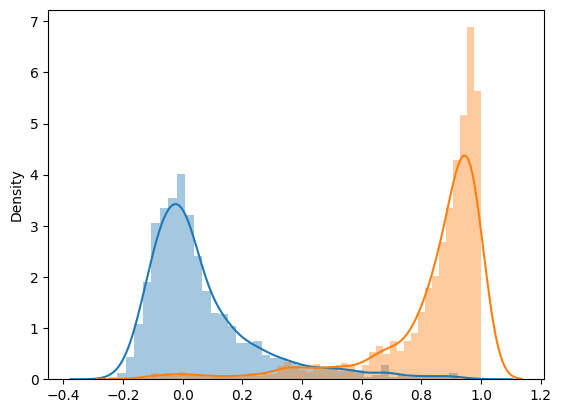

In [ ]:
from sklearn.metrics.pairwise import paired_cosine_distances, paired_euclidean_distances, paired_manhattan_distances
embeddings1 = model.encode(final_test_data['sentence1'].tolist(),
                           batch_size=8, show_progress_bar=True, convert_to_numpy=True)

embeddings2 = model.encode(final_test_data['sentence2'].tolist(),
                           batch_size=8, show_progress_bar=True, convert_to_numpy=True)

labels = final_test_data['train_label'].tolist()

cosine_scores = 1 - (paired_cosine_distances(embeddings1, embeddings2))

print(cosine_scores[:int(len(test_df_lab0))].mean()) # dissimilar pairs
print(cosine_scores[int(len(test_df_lab1)):].mean()) # similar pairs
import seaborn as sns
sns.distplot(cosine_scores[:int(len(test_df_lab0))], label = "0")
sns.distplot(cosine_scores[int(len(test_df_lab1)):], label = "1")

Train our model from scratch define our own layers and base roberta model


In [ ]:
import torch
from sentence_transformers import models, SentenceTransformer

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

bert = models.Transformer('distilbert-base-uncased')
pooler = models.Pooling(
    bert.get_word_embedding_dimension(),
    pooling_mode_mean_tokens=True
)

my_model = SentenceTransformer(
    modules=[bert, pooler],
    device=device
)
print(my_model)

Using cuda:0 device


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)


In [ ]:
from sentence_transformers import losses
train_loss = losses.CosineSimilarityLoss(my_model)

#Tune the model
model.fit(train_objectives=[(loader, train_loss)], 
          epochs=2, 
          warmup_steps=20000,
          output_path='./my_model')

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/997 [00:00<?, ?it/s]

Iteration:   0%|          | 0/997 [00:00<?, ?it/s]

In [ ]:
model_name = './my_model'
my_model = SentenceTransformer(model_name)

Batches:   0%|          | 0/494 [00:00<?, ?it/s]

Batches:   0%|          | 0/494 [00:00<?, ?it/s]

0.06474263
0.835255


<ipython-input-45-d2bc3f3583aa>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cosine_scores[:int(len(test_df_lab0))], label = "0")
<ipython-input-45-d2bc3f3583aa>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cosine_scores[int(len(test_df_lab1)):], label = "1")


<Axes: ylabel='Density'>

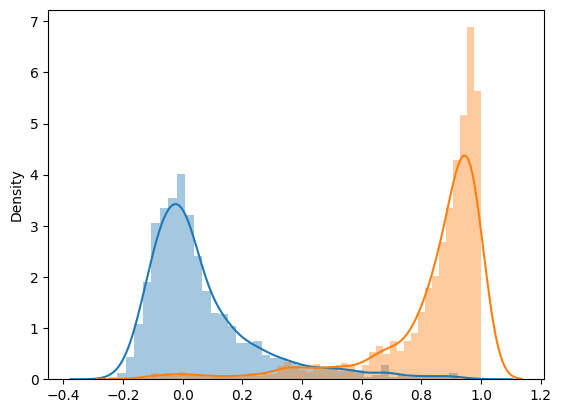

In [ ]:
from sklearn.metrics.pairwise import paired_cosine_distances, paired_euclidean_distances, paired_manhattan_distances
embeddings1 = my_model.encode(final_test_data['sentence1'].tolist(),
                           batch_size=8, show_progress_bar=True, convert_to_numpy=True)

embeddings2 = my_model .encode(final_test_data['sentence2'].tolist(),
                           batch_size=8, show_progress_bar=True, convert_to_numpy=True)

labels = final_test_data['train_label'].tolist()

cosine_scores = 1 - (paired_cosine_distances(embeddings1, embeddings2))

print(cosine_scores[:int(len(test_df_lab0))].mean()) # dissimilar pairs
print(cosine_scores[int(len(test_df_lab1)):].mean()) # similar pairs
import seaborn as sns
sns.distplot(cosine_scores[:int(len(test_df_lab0))], label = "0")
sns.distplot(cosine_scores[int(len(test_df_lab1)):], label = "1")

In [ ]:

import datasets

sts = datasets.load_dataset('glue', 'stsb', split='validation')

sts

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 1500
})

In [ ]:
sts = sts.map(lambda x: {'label': x['label'] / 5.0})

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
from sentence_transformers import InputExample

samples = []
for sample in sts:
    samples.append(InputExample(
        texts=[sample['sentence1'], sample['sentence2']],
        label=sample['label']
    ))

In [ ]:
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator

evaluator = EmbeddingSimilarityEvaluator.from_input_examples(
    samples, write_csv=False
)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')
print(evaluator(model))
#print(evaluator('./trained_model'))
evaluator(my_model)

0.8810899061987415


0.8468962776495415